#Predict & Analysis House Rent depending on parameter such as Area, No. of Bedroom etc. by Using Multiple Linear regression Algorithm

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
data = pd.read_csv('C:\Programming\Projects\House Prediction model\Housing.csv')

# Display the first few rows of the dataset
print(data.head())
print(data.info())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\HP\AppData\Local\Temp\ipykernel_6492\1470005175.py:2: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv('C:\Programming\Projects\House Prediction model\Housing.csv')


In [4]:
# Convert categorical features to numerical
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

# Selecting the target and features
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2292721545725.3623
R-squared: 0.5464062355495871


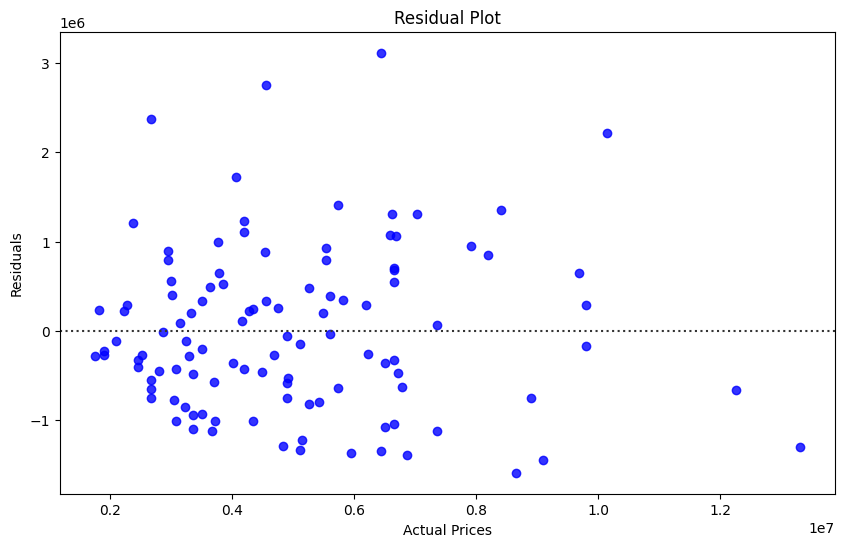

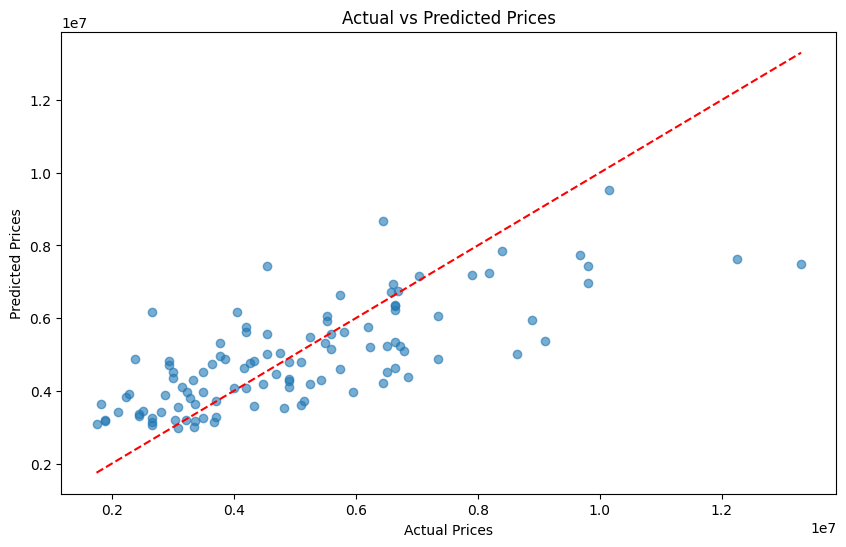

In [12]:
# Residual plot
plt.figure(figsize=(10,6))
sns.residplot(x=y_test, y=y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [13]:
# Take user input for predictions
area = float(input("Enter area: "))
bedrooms = int(input("Enter number of bedrooms: "))
bathrooms = int(input("Enter number of bathrooms: "))
stories = int(input("Enter number of stories: "))
parking = int(input("Enter number of parking spaces: "))

# Create a DataFrame for prediction
user_data = pd.DataFrame([[area, bedrooms, bathrooms, stories, parking]], columns=['area', 'bedrooms', 'bathrooms', 'stories', 'parking'])

# Predict price
predicted_price = model.predict(user_data)
print(f"The predicted price for the given input is: {predicted_price[0]}")


The predicted price for the given input is: 5077830.108999284
